<a href="https://colab.research.google.com/github/Adarsh2shark/Detecting-depression-using-tweets/blob/main/week_2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [ ]:
df = pd.read_csv("Sentiment Analysis Dataset 2.csv",sep=",",error_bad_lines=False, skiprows=[8835,535881])
# Keeping only the neccessary columns
df = df[['Sentiment', 'SentimentText']]

In [3]:
##  lower casing all the text in the column

## first converting the SentimentText into string so that float type error do not show up
df.SentimentText = df.SentimentText.astype(str)
df['SentimentText'] = df['SentimentText'].apply(lambda x: x.lower())
##  using re library (regular expresion) to see if the string matches the regular expression
df['SentimentText'] = df['SentimentText'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

##  
print(df[ df['Sentiment'] == 1].size)
print(df[ df['Sentiment'] == 0].size)

##  max_fatures helps to find the number of features to take into account in order to make the best split.
max_fatures = 2000
##  tokenizing splits up a larger body of text into smaller lines
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['SentimentText'].values)
X = tokenizer.texts_to_sequences(df['SentimentText'].values)
X = pad_sequences(X)

214160
156208


In [4]:
embed_dim = 50
lstm_out = 80
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out, dropout = 0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 50)            100000    
                                                                 
 lstm (LSTM)                 (None, 80)                41920     
                                                                 
 dense (Dense)               (None, 2)                 162       
                                                                 
Total params: 142,082
Trainable params: 142,082
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
Y = pd.get_dummies(df['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(124073, 40) (124073, 2)
(61111, 40) (61111, 2)


In [6]:
batch_size = 35
model.fit(X_train, Y_train, batch_size=batch_size, verbose = 2)

3545/3545 - 66s - loss: 0.5016 - accuracy: 0.7519 - 66s/epoch - 19ms/step


In [7]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

1704/1704 - 10s - loss: 0.4803 - accuracy: 0.7661 - 10s/epoch - 6ms/step
score: 0.48
acc: 0.77


In [8]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    #print(data['text'].iloc[-validation_size+x])
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
    #print(result)
    #print(Y_validate[x])
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    #print(np.argmax(Y_validate[x]))
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1
    #print(np.argmax(result) == np.argmax(Y_validate[x]))
    #print()
    #print()
    
#print("pos_cnt", pos_cnt)
#print("neg_cnt", neg_cnt)
#print("pos_correct", pos_correct)
#print("neg_correct", neg_correct)

print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 324ms/epoch - 324ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 15ms/epoch - 15ms/step
1/1 - 0s - 14ms/epoch - 14ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 11ms/epoch - 11ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 12ms/epoch - 12ms/step
1/1 - 0s - 13ms/epoch - 13ms/step
1/1 - 0s - 15ms/epoch - 15ms/step
1/1 - 0s - 15ms/epoch - 15ms/step
1/1 - 0s - 1

In [ ]:
################### Word to vector conversion  #########################################

In [9]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('SentimentText'):
    print(dirname)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import os
from collections import Counter
import logging
import time
import pickle
import itertools
import gc
import json
from keras_preprocessing.text import tokenizer_from_json
from keras.models import model_from_json

pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)

In [11]:
## v tweet_data = pd.read_csv('Sentiment Analysis Dataset 2.csv' , sep = ',',  usecols = ['SentimentText', 'Sentiment' ] )

twitter_data = df.rename(columns = {'Sentiment': 'Sentiment_value' , 'SentimentText':'reviews'})
display(twitter_data['Sentiment_value'].value_counts()/twitter_data.shape[0]*100)
print('Shape of Dataset -> ' , twitter_data.shape)
twitter_data.head()

1    57.82357
0    42.17643
Name: Sentiment_value, dtype: float64

Shape of Dataset ->  (185184, 2)


,Sentiment_value,reviews
0,0,is so sad for my apl friend
1,0,i missed the new moon trailer
2,1,omg its already 730 o
3,0,omgaga im sooo im gunna cry ive been at this dentist since 11 i was suposed 2 just get a crown put on 30mins
4,0,i think mi bf is cheating on me t_t


In [12]:
twitter_data = twitter_data.sample(frac= 0.05 , random_state = 10)

In [13]:
from spacy.lang.en.stop_words import STOP_WORDS
# stop_words = stopwords.words("english")
stop_words = STOP_WORDS
stemmer = SnowballStemmer("english")
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|<.*?>|[^A-Za-z0-9]+"
Emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = re.sub(Emoji_pattern, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [14]:
## time check by the cpu
twitter_data.reviews = twitter_data.reviews.apply(lambda x: preprocess(x))

documents = [_text.split() for _text in twitter_data.reviews] 



In [15]:
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)


w2v_model.build_vocab(documents)

In [16]:
words = w2v_model.wv.vocab.keys()
## findin gthe length of the words. 
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 899


In [17]:
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(965179, 2155360)

In [18]:
w2v_model.most_similar(positive=['awesome'],topn=100)

[('beautiful', 0.8979760408401489),
 ('concert', 0.8946964740753174),
 ('gorgeous', 0.864042341709137),
 ('chris', 0.8638564348220825),
 ('davidarchie', 0.8635561466217041),
 ('congratulations', 0.8450937271118164),
 ('lovely', 0.82585608959198),
 ('seeing', 0.8223913311958313),
 ('uk', 0.8212070465087891),
 ('enjoy', 0.8208935856819153),
 ('perfect', 0.8184670805931091),
 ('super', 0.8173128366470337),
 ('enjoying', 0.8155832290649414),
 ('sweet', 0.809813380241394),
 ('hows', 0.8093452453613281),
 ('wonderful', 0.8036977052688599),
 ('watched', 0.7969310879707336),
 ('youll', 0.796141505241394),
 ('replying', 0.7950810790061951),
 ('favorite', 0.7942168712615967),
 ('meeting', 0.7895702719688416),
 ('girls', 0.7866674661636353),
 ('cheers', 0.7850534915924072),
 ('cake', 0.7848570346832275),
 ('david', 0.7834557294845581),
 ('weather', 0.7829325199127197),
 ('great', 0.7828077077865601),
 ('hun', 0.7792352437973022),
 ('amazing', 0.7777743935585022),
 ('hello', 0.7750428915023804),
 

In [19]:
w2v_model

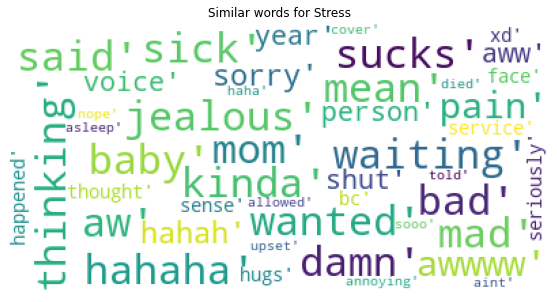

In [23]:
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str([x[0] for x in w2v_model.most_similar("sad",topn=100)]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Similar words for Stress")
plt.show()

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(twitter_data.reviews)
vocab_size = len(tokenizer.word_index)+1
print('Vocab Size is ',vocab_size)

Vocab Size is  21141


In [26]:
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

In [27]:
x_data = pad_sequences(tokenizer.texts_to_sequences(twitter_data.reviews) , maxlen = SEQUENCE_LENGTH)


In [28]:
y_data = twitter_data.Sentiment_value
print(x_data.shape)
print(y_data.shape)
y_data = y_data.values.reshape(-1,1)

(9259, 300)
(9259,)


In [31]:
w2v_model.wv['sad'].shape

(300,)

In [32]:
embedding_matrix = np.zeros((vocab_size , W2V_SIZE))
for word , i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(21141, 300)


In [44]:
model = Sequential()
# Embedded layer
model.add(Embedding( vocab_size , W2V_SIZE , weights=[embedding_matrix], input_length = SEQUENCE_LENGTH, trainable=False))
# Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
# LSTM Layer
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 300, 300)          6342300   
                                                                 
 conv1d_8 (Conv1D)           (None, 300, 32)           28832     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 150, 32)          0         
 1D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 150, 32)           0         
                                                                 
 lstm_9 (LSTM)               (None, 300)               399600    
                                                                 
 dropout_17 (Dropout)        (None, 300)               0         
                                                     

In [45]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'nadam' , metrics = ['accuracy'] )
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [48]:
#  history = model.fit(x_data , y_data , batch_size = BATCH_SIZE , epochs = EPOCHS , validation_split = 0.1  , 
   #                 verbose = 1 , callbacks = callbacks)




early_stop = EarlyStopping(monitor='val_loss', patience=3)

hist = model.fit(x_data, y_data,
        epochs=EPOCHS, batch_size=40, shuffle=True, \
        callbacks=[early_stop])

Epoch 1/8
232/232 [==============================] - ETA: 0s - loss: 0.6297 - accuracy: 0.6408

232/232 [==============================] - 104s 446ms/step - loss: 0.6297 - accuracy: 0.6408
Epoch 2/8
232/232 [==============================] - ETA: 0s - loss: 0.6090 - accuracy: 0.6534

232/232 [==============================] - 106s 455ms/step - loss: 0.6090 - accuracy: 0.6534
Epoch 3/8
232/232 [==============================] - ETA: 0s - loss: 0.6008 - accuracy: 0.6657

232/232 [==============================] - 100s 430ms/step - loss: 0.6008 - accuracy: 0.6657
Epoch 4/8
232/232 [==============================] - ETA: 0s - loss: 0.6210 - accuracy: 0.6689

232/232 [==============================] - 98s 423ms/step - loss: 0.6210 - accuracy: 0.6689
Epoch 5/8
232/232 [==============================] - ETA: 0s - loss: 0.5896 - accuracy: 0.6770

232/232 [==============================] - 97s 420ms/step - loss: 0.5896 - accuracy: 0.6770
Epoch 6/8
232/232 [==============================] - ETA: 0s - loss: 0.5850 - accuracy: 0.6793

232/232 [==============================] - 99s 425ms/step - loss: 0.5850 - accuracy: 0.6793
Epoch 7/8
232/232 [==============================] - ETA: 0s - loss: 0.5785 - accuracy: 0.6852

232/232 [==============================] - 98s 420ms/step - loss: 0.5785 - accuracy: 0.6852
Epoch 8/8
232/232 [==============================] - ETA: 0s - loss: 0.5818 - accuracy: 0.6854

232/232 [==============================] - 98s 422ms/step - loss: 0.5818 - accuracy: 0.6854


In [49]:
def predict(text):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]

    return {"score": float(score),
       "elapsed_time": time.time()-start_at}  

In [50]:
print(predict('i am not Happy'))
print(predict('i not feeling so great '))
print(predict('i learned alot but i am tired'))
print(predict('i am crying'))
print(predict('good is not good'))
print(predict('bad is not good'))
print(predict('nothing is good'))
print(predict('how did i end up here'))

1/1 [==============================] - 0s 383ms/step
{'score': 0.9219103455543518, 'elapsed_time': 0.42737603187561035}
1/1 [==============================] - 0s 27ms/step
{'score': 0.7573109865188599, 'elapsed_time': 0.0542750358581543}
1/1 [==============================] - 0s 27ms/step
{'score': 0.5987145304679871, 'elapsed_time': 0.06126976013183594}
1/1 [==============================] - 0s 28ms/step
{'score': 0.5893405675888062, 'elapsed_time': 0.05919337272644043}
1/1 [==============================] - 0s 26ms/step
{'score': 0.9338324666023254, 'elapsed_time': 0.06545352935791016}
1/1 [==============================] - 0s 38ms/step
{'score': 0.37883710861206055, 'elapsed_time': 0.07252621650695801}
1/1 [==============================] - 0s 24ms/step
{'score': 0.8582165241241455, 'elapsed_time': 0.06093192100524902}
1/1 [==============================] - 0s 30ms/step
{'score': 0.5438278913497925, 'elapsed_time': 0.06661224365234375}


In [51]:
model.save_weights('model_weights.h5')
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())
    
model.save('entire_model.h5')
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))